# COVID-19 Prediction Model


### (1) Applying Linear and Logistic Regression to COVID-19 cases to plot future cases
### (2) Data Visualization of COVID-19 cases and future predictions
### (3) Applying Calculus First and Second Derivative Test to Indicate When COVID-19 Cases May Stop

Aadit Trivedi, 2020

### References
https://github.com/therealcyberlord/coronavirus_visualization_and_prediction/blob/master/coronavirus-covid-19-visualization-prediction.ipynb <-- key reference

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030


In [4]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,15,16,19,22,22,27,29,29,29,33
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,3


In [5]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,34,34,35,35,35,35,41,42,42,42
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,118,118,118,144,144,144,150,191
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,96,96,97,105,105,109,114,114,114,124
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,26,26,26,35,42,42,49,60,75,87


In [6]:
cols = confirmed_df.keys()

In [7]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [8]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [9]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [10]:
days_in_future = 5
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-5]

In [11]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [12]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)


In [13]:
kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.5s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=40, n_jobs=-1,
          param_distributions={'kernel': ['poly', 'sigmoid', 'rbf'], 'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1], 'shrinking': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=1)

In [14]:
svm_search.best_params_


{'shrinking': False, 'kernel': 'poly', 'gamma': 0.01, 'epsilon': 1, 'C': 1}

In [15]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 34715.609614432724
MSE: 1955707362.8915515


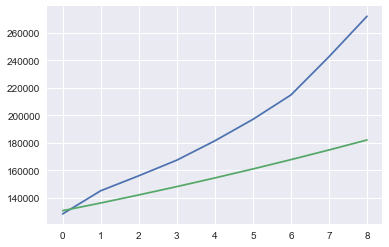

In [16]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [17]:
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 56987.018572762405
MSE: 4684653804.915125


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [18]:
print(linear_model.coef_[0][0])
print(linear_model.intercept_[0])

2559.6482593037226
-5704.802352941202


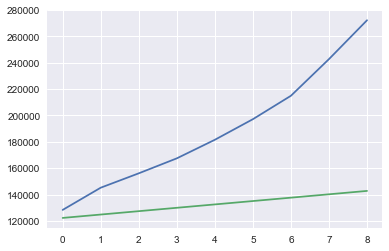

In [19]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

In [20]:
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge()
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.2s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=40, n_jobs=-1,
          param_distributions={'tol': [0.0001, 0.001, 0.01], 'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001], 'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001], 'lambda_1': [1e-07, 1e-06, 1e-05, 0.0001], 'lambda_2': [1e-07, 1e-06, 1e-05, 0.0001]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=1)

In [21]:
bayesian_search.best_params_


{'tol': 0.0001,
 'lambda_2': 1e-05,
 'lambda_1': 1e-07,
 'alpha_2': 1e-05,
 'alpha_1': 0.0001}

In [22]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 57029.55317419262
MSE: 4689779530.142963


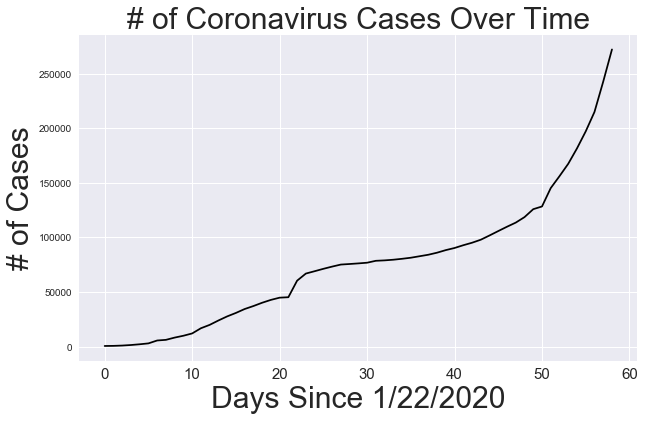

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(adjusted_dates, world_cases, color='black')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=15)
plt.show()

# SVM Model

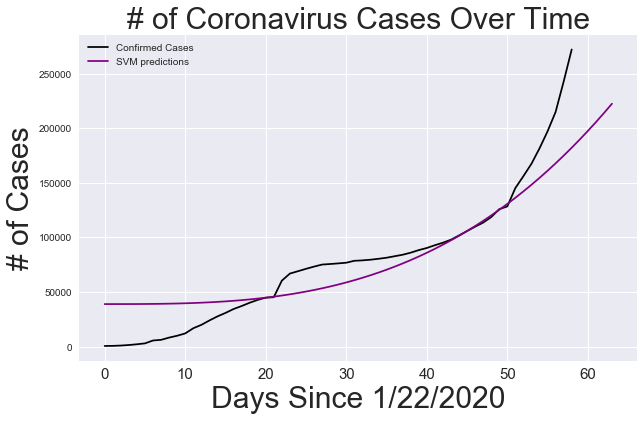

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(adjusted_dates, world_cases, color='black')
plt.plot(future_forcast, svm_pred, color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.show()

# Linear Regression Model

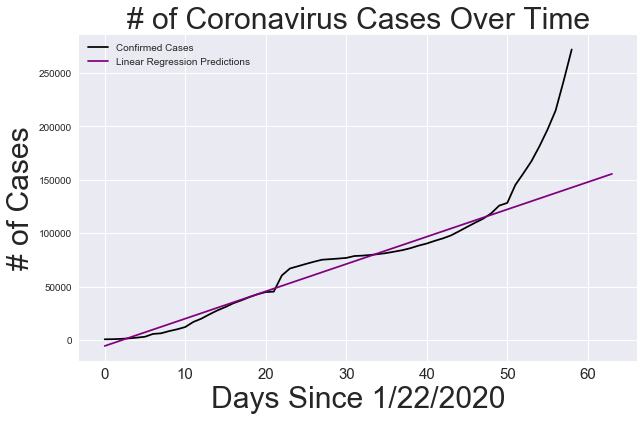

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(adjusted_dates, world_cases, color='black')
plt.plot(future_forcast, linear_pred, color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.show()

# Bayesian Ridge Regression Predictions

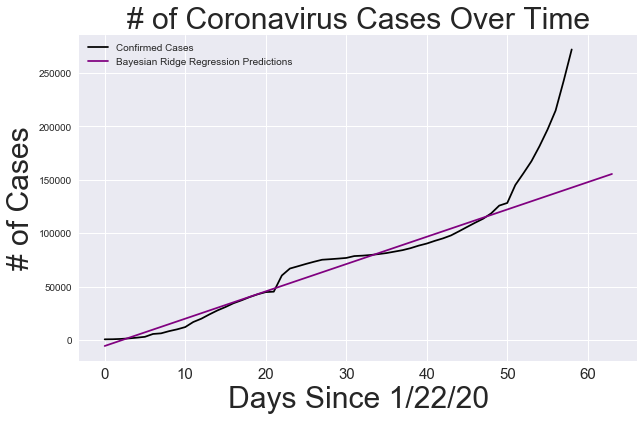

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(adjusted_dates, world_cases, color='black')
plt.plot(future_forcast, bayesian_pred, color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/20', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=15)
plt.show()

# All Predictions

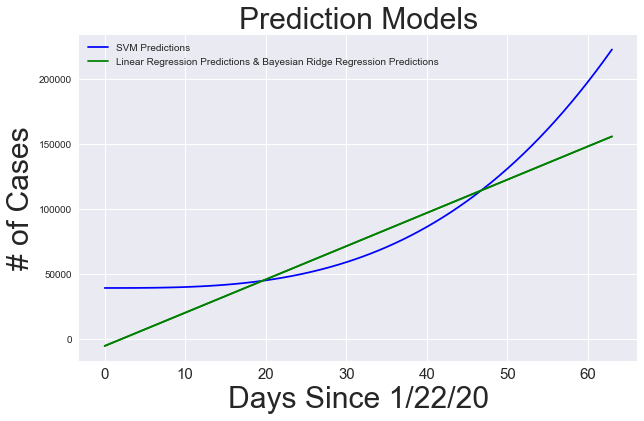

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(future_forcast, svm_pred, color='blue')
plt.plot(future_forcast, linear_pred, color='green')
plt.plot(future_forcast, bayesian_pred, color='green')
plt.title('Prediction Models', size=30)
plt.xlabel('Days Since 1/22/20', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['SVM Predictions', 'Linear Regression Predictions & Bayesian Ridge Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [28]:
from datetime import date
today = date.today()
print(today)

2020-03-21


In [29]:
data_start_date = datetime.date(2020, 1, 22)
delta = today - data_start_date
days_diff = delta.days
print(days_diff)

59


# All Predictions with "Today" Indicator

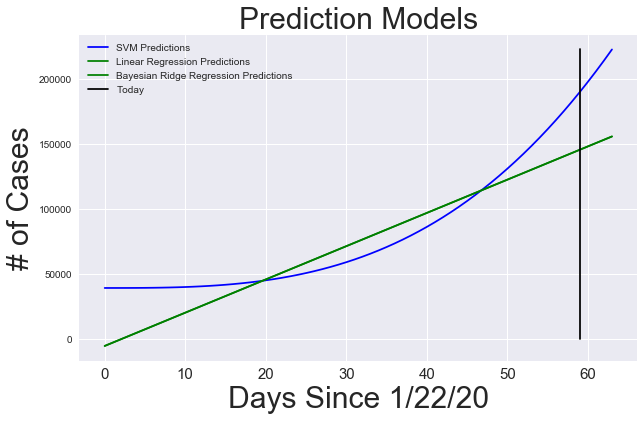

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(future_forcast, svm_pred, color='blue')
plt.plot(future_forcast, linear_pred, color='green')
plt.plot(future_forcast, bayesian_pred, color='green')
plt.plot([days_diff, days_diff], [0, max(svm_pred)], color ='black')
plt.title('Prediction Models', size=30)
plt.xlabel('Days Since 1/22/20', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['SVM Predictions', 'Linear Regression Predictions', 'Bayesian Ridge Regression Predictions', 'Today'])
plt.xticks(size=15)
plt.show()

# Calculus Application in Refining COVID-19 Model

While the linear regression model may not be the best future indicator for coronavirus cases, tracking the linear regression slope each and every single day can still offer invaluable insight as to whether or not the spread of coronavirus is slowing down.

We can use calculus to achieve this.
Refer to First and Second Derivative Test.

In [31]:
import sympy as sym
x = sym.Symbol('x')
sym.diff(x**5)

5*x**4

In [32]:
intercept = linear_model.intercept_[0]
coefficient = linear_model.coef_[0][0]
x = sym.Symbol('x')
slope = sym.diff(coefficient*x + intercept)

print("As of today: Linear equation C(x) = " + str(coefficient) + "x + " + str(intercept))
print("Derivative C'(x) = " + str(slope) + "x")

As of today: Linear equation C(x) = 2559.6482593037226x + -5704.802352941202
Derivative C'(x) = 2559.64825930372x


### Second Derivative Test

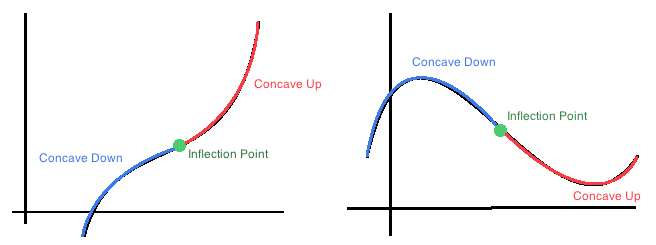

Inflection point when C''(x) = 0
Indicates that C'(x) increasing at decreasing rate

In [33]:
from csv import writer

with open("COVID-19-First-Derivative.csv", 'a+', newline='') as write_obj:
    csv_writer = writer(write_obj)
    csv_writer.writerow([today, sym.diff(coefficient*x + intercept)])

fd = pd.read_csv("COVID-19-First-Derivative.csv")
fd = fd.drop_duplicates(subset='Date')
fd.head()

,Date,Slope
0,2020-03-18,2539.902521
5,2020-03-19,2543.967041
8,2020-03-20,2559.648259
9,2020-03-21,2559.648259


They key is to collect the rate of change (cases/day) each and every single day and run linear regression on the last couple of rates to determine whether or not the rate of change (cases/day) is slowing down or not. Hopefully, it's slowing down.

In [36]:
fd_vals = pd.DataFrame(fd['Slope'])
print(len(fd_vals))
print(fd_vals)
recent_x_axis = np.array([1,2,3]).reshape(-1, 1) # Set up x-axis to train linear regression model
print(fd_vals.shape)
print(recent_x_axis.shape)

4
         Slope
0  2539.902521
5  2543.967041
8  2559.648259
9  2559.648259
(4, 1)
(3, 1)


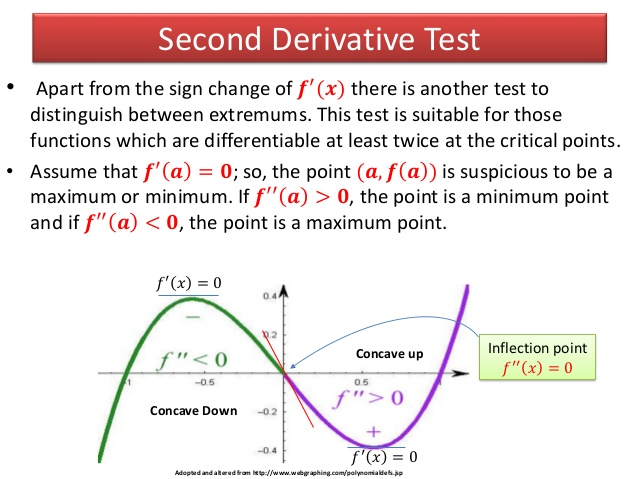

# COVID-19 Diagnosis Using the Second Derivative

Have we reached the inflection point (the point at which the rate of coronavirus cases increases at decreasing rate)?

In [40]:
sd = LinearRegression()
sd.fit(recent_x_axis, fd_vals[-3:])

print('------------------------')
print('Given C(x) represents the number of coronavirus with x being the number of days after 1/22/20')
print("C'(x) = " + str(slope) + "x")
print("C''(x) = " + str(sd.coef_[0][0]))

if (sd.coef_ == 0):
    print(" We have reached the inflection point. The rate of coronavirus cases will now increase at a decreasing rate.")
elif (sd.coef_ > 0):
    print("C''(x) > 0")
    print("Coronavirus cases continue at a high rate")
elif (sd.coef_ < 0):
    print("C''(x) < 0")
    print("Coronavirus cases are slowing down!")
print('------------------------')


------------------------
Given C(x) represents the number of coronavirus with x being the number of days after 1/22/20
C'(x) = 2559.64825930372x
C''(x) = 7.840609243694868
C''(x) > 0
Coronavirus cases continue at a high rate
------------------------


# Determining the Point of Inflection

### Applying Linear Regression to the Second Derivative

### 1. Creating the Dataset

The key is to use the three most recent second derivatives so that our linear regression model is the most accurate

In [52]:
with open("COVID-19-Second-Derivative.csv", 'a+', newline='') as write_object:
    sd_writer = writer(write_object)
    sd_writer.writerow([today, sd.coef_[0][0]])

sd_frame = pd.read_csv("COVID-19-Second-Derivative.csv")
sd_frame = sd_frame.drop_duplicates(subset='Date')
sd_frame.head()

,Date,Second Derivative
0,2020-03-21,7.840609


### 2. Reading the Dataset

In [54]:
sd_vals = pd.DataFrame(sd_frame['Second Derivative'])
print(sd_vals)
print(sd_vals.shape)
print(recent_x_axis)
print(recent_x_axis.shape)

   Second Derivative
0           7.840609
(1, 1)
[[1]
 [2]
 [3]]
(3, 1)


### 3. Applying Linear Regression to find Coefficients and Intercept for Rate of Second Derivative Change

In [ ]:
_sd = LinearRegression()
_sd.fit(recent_x_axis, sd_vals[-3:])

print(_sd.coef_)
if (_sd.coef_ > 0):
    print("Rate of coronavirus cases are increasing at an increasing rate.")
elif (_sd.coef_ < 0):
    print("Rate of Change for Second Derivative: " + str(_sd.coef_))
    print("Intercept of Function of Second Derivative Change: " + str(_sd.intercept_))

### 4. Finally - find point of inflection using x-intercept analysis

We have the intecept and coefficient of the function. Now, we are basically trying to find the x-value when y = 0

<img src="img/x_int.png" alt="drawing" width="450" height="450" align="left"/>
<br />
<img src="img/x_int_analysis.png" alt="drawing" width="350" height="350" align="right"/>


In [ ]:
b = _sd.intercept_
m = _sd.coef_
x_int = (-b/m)
days_until_poi = math.trunc(x_int) + 1

latest_date = pd.DataFrame(sd_frame['Date'])[-1:][0]
poi_date = latest_date + datetime.delta(days=days_until_poi)

print("The function of COVID-19 cases will reach an inflection point in " + str(days_until_poi) + " days on " + str(poi_date))
